# <center>Support Vector Regression (SVR)</center>

SVR memberi fleksibilitas untuk menentukan seberapa besar kesalahan yang dapat diterima dalam model dan akan menemukan garis yang sesuai (atau hyperplane dalam dimensi yang lebih tinggi) agar sesuai dengan data.
Berbeda dengan Least Square biasa, fungsi tujuan SVR adalah untuk meminimalkan koefisien — lebih khusus lagi, l2-norm vektor koefisien — bukan squared error.


Mengimpor libraries yang diperlukan

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn 

## Membaca Data

In [21]:
df = pd.read_csv("svm.csv")
# melihat dataset
df.head()

,x,y
0,2010,936583
1,2011,961122
2,2012,986303
3,2013,101214
4,2014,103866


### Eksplorasi Data
Eksplorasi deskriptif data yang diunduh.

In [22]:
# merangkum data
df.describe()

,x,y
count,26.000000,26.000000
mean,2022.500000,217425.538462
std,7.648529,276364.265227
min,2010.000000,11449.000000
25%,2016.250000,116795.750000
50%,2022.500000,131339.000000
75%,2028.750000,149327.000000
max,2035.000000,986303.000000


Beberapa fitur dapat dieksplorasi dengan cara berikut.

In [23]:
cdf = df[['x','y']]
cdf.head(10)

,x,y
0,2010,936583
1,2011,961122
2,2012,986303
3,2013,101214
4,2014,103866
5,2015,116686
6,2016,109217
7,2017,111853
8,2018,11449
9,2019,117125


Fitur-fitur tersebut dapat diplot sebagai berikut:

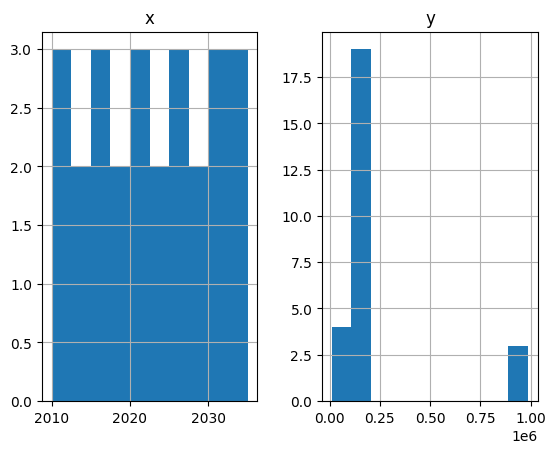

In [24]:
viz = cdf[['x','y']]
viz.hist()
plt.show()

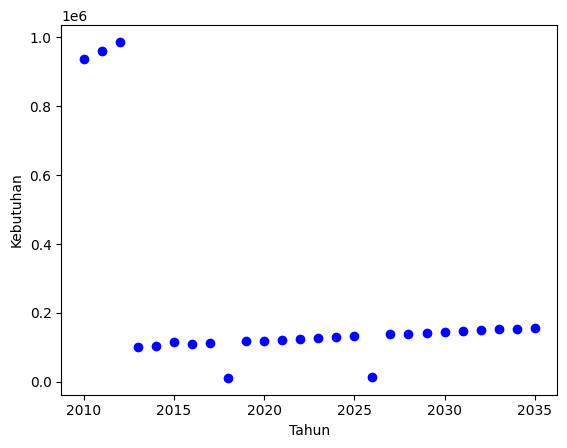

In [25]:
plt.scatter(cdf.x, cdf.y,  color='blue')
plt.xlabel("Tahun")
plt.ylabel("Kebutuhan")
plt.show()

#### Pembuatan dataset pelatihan dan pengujian
Pemisahan data latih/uji melibatkan pemisahan dataset menjadi dataset pelatihan dan pengujian, yang saling eksklusif. Setelah itu, dataset pelatihan dapat digunakan untuk membuat model dan dataset pengujian untuk pengujian.
Hal ini akan memberikan evaluasi yang lebih akurat pada akurasi out-of-sample karena dataset pengujian bukan merupakan bagian dari dataset yang telah digunakan untuk melatih data. Ini lebih realistis untuk masalah dunia nyata.

Ini berarti bahwa hasil dari setiap titik data dalam kumpulan data ini diketahui, sehingga sangat bagus untuk data pengujian. Dataset pengujian belum digunakan untuk melatih model, sehingga model tidak memiliki pengetahuan tentang hasil dari data ini, sehingga dapat disebut pengujian di luar sampel.



In [28]:
# Mengambil "TAHUN" sebagai variabel independen (regressor)
X = cdf.iloc[:, 0].values
# Mengambil "KEBUTUHAN" sebagai variabel dependen
y = cdf.iloc[:, 1].values
# Reshape data karena hanya menggunakan satu fitur "TAHUN"
X = X.reshape(-1,1)
# Reshape data karena hanya satu fitur
y = y.reshape(1,-1)


Proses splitting dataset pelatihan dan pengujian

In [29]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.53, random_state=42)


Normalisasi atau scaling dataset

In [30]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X_train)
y = sc_y.fit_transform(y_train)

Pembuatan Model

In [31]:
# Fitting SVR to the dataset
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVR
#linear = Linear Kernel
regressor = SVR(C=1.0, kernel='linear', degree=3, gamma='auto')
regressor.fit(X, y)


/Volumes/Data/KAMPUS/NGAJAR/Contoh Kasus regresi SVR/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(gamma='auto', kernel='linear')

Prediksi nilai baru dengan model yang telah dibentuk

In [32]:
import math
y_pred = regressor.predict(sc_X.transform(np.array([[2035]])))
y_pred = sc_y.inverse_transform(y_pred)

y_prdiksi = regressor.predict(X_test)
coba = y_pred.astype(int)

nira=coba*7
lahanhari=sum(nira/(288*360))
lahantahun = sum(nira/288)
# lahan=sum(nira/288*360)

print("Permintaan (kg) :", y_pred.round(0), "Kg")
print("kebutuhan Nira (L) :",sum(nira.round()))
print("Kebutahan lahan kelapa/tahun :", round(lahantahun))
print("Kebutahan lahan kelapa/hari :",round(lahanhari))


ValueError: Expected 2D array, got 1D array instead:
array=[1.33904388].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [33]:
from sklearn.metrics import r2_score, mean_squared_error
import math
# test_x = array(cdf[['X']])
# test_y = np.asanyarray(cdf[['y']])
test   =sc_y.inverse_transform(y_pred)
# test_y_ = sc_y.inverse_transform(regressor.predict(sc_X.transform(test_x)))
# MSE = np.square(np.subtract(y_test, test)).mean()
MSE = mean_squared_error(y_test, y_prdiksi)
RMSE = np.sqrt(MSE)

# hasil=RMSE/10000000
print("RMSE",round(hasil,3))
scores = cross_val_score(regressor, Xa, ya, cv=3)
print("Akurasi model SVM untuk tiap fold: ", scores)
print("Akurasi model SVM dengan 3-Fold Cross Validation: ", scores.mean())


ValueError: Expected 2D array, got 1D array instead:
array=[1.33904388].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.